In [26]:
import matplotlib
import matplotlib.pyplot as plt
import rustworkx as rx
from rustworkx.visualization import mpl_draw as draw_graph
import numpy as np
from scipy.optimize import minimize
from collections import defaultdict
from typing import Sequence
 
 
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import QAOAAnsatz
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeWashingtonV2

from qiskit import QuantumCircuit

from qiskit.circuit.library import efficient_su2
from qiskit.circuit.library import TwoLocal
from qiskit.circuit.library import RealAmplitudes

In [27]:
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler

In [28]:
import numpy as np
import qubovert

In [29]:
data = np.load("sat.npz")
qubo_mat = data['qubo']
n_qubits = len(data['syms'])
print(data)
print(data['syms'])
print(qubo_mat)

NpzFile 'sat.npz' with keys: qubo, lvars, syms
['sat.$id00006.A' 'sat.$id00006.B' 'sat.$id00006.Y' 'sat.$id00004.A'
 'sat.$id00004.Y' 'sat.$id00005.A' 'sat.$id00005.B' 'sat.$id00005.Y'
 'sat.b' 'sat.c' 'sat.a']
[[ 4.  2. -4.  0.  0.  0.  0.  0.  0.  0. -8.]
 [ 0.  4. -4.  0. -8.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  4.  0.  0. -8.  0.  0.  0.]
 [ 0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  6.  2. -4. -8.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  6. -4.  0. -8.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  4.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]]


In [30]:
qubo = qubovert.utils.matrix_to_qubo(qubo_mat)
ising = qubovert.utils.qubo_to_quso(qubo)
qubo_dict = dict(qubo)
ising_dict = dict(ising)
print(ising_dict)
print(len(ising_dict))
ising_dict.pop(())
print(ising_dict)
print(len(ising_dict))
ising_mat = qubovert.utils.qubo_to_matrix(ising_dict)
print(ising_mat)

{(0,): np.float64(0.5), (): np.float64(10.0), (0, 1): np.float64(0.5), (1,): np.float64(0.5), (0, 2): np.float64(-1.0), (2,): np.float64(1.0), (0, 10): np.float64(-2.0), (1, 2): np.float64(-1.0), (1, 4): np.float64(-2.0), (3, 4): np.float64(1.0), (3, 7): np.float64(-2.0), (7,): np.float64(1.0), (5,): np.float64(-0.5), (5, 6): np.float64(0.5), (6,): np.float64(-0.5), (5, 7): np.float64(-1.0), (5, 8): np.float64(-2.0), (6, 7): np.float64(-1.0), (6, 9): np.float64(-2.0)}
19
{(0,): np.float64(0.5), (0, 1): np.float64(0.5), (1,): np.float64(0.5), (0, 2): np.float64(-1.0), (2,): np.float64(1.0), (0, 10): np.float64(-2.0), (1, 2): np.float64(-1.0), (1, 4): np.float64(-2.0), (3, 4): np.float64(1.0), (3, 7): np.float64(-2.0), (7,): np.float64(1.0), (5,): np.float64(-0.5), (5, 6): np.float64(0.5), (6,): np.float64(-0.5), (5, 7): np.float64(-1.0), (5, 8): np.float64(-2.0), (6, 7): np.float64(-1.0), (6, 9): np.float64(-2.0)}
18
[[ 0.5  0.5 -1.   0.   0.   0.   0.   0.   0.   0.  -2. ]
 [ 0.   0.5 

In [31]:
model_solution = qubo.solve_bruteforce()
print("Variable assignment:", model_solution)
print("Model value:", qubo.value(model_solution))
print("Constraints satisfied?", qubo.is_solution_valid(model_solution))

Variable assignment: {0: 1, 1: 1, 2: 1, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 1}
Model value: -6.0
Constraints satisfied? True


In [32]:
model_solution = ising.solve_bruteforce()
print("Variable assignment:", model_solution)
print("Model value:", ising.value(model_solution))
print("Constraints satisfied?", ising.is_solution_valid(model_solution))

Variable assignment: {0: -1, 1: -1, 2: -1, 3: 1, 4: -1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: -1}
Model value: -6.0
Constraints satisfied? True


In [33]:
ising2=qubovert.QUSO(ising_dict)
model_solution = ising2.solve_bruteforce()
print("Variable assignment:", model_solution)
print("Model value:", ising2.value(model_solution))
print("Constraints satisfied?", ising2.is_solution_valid(model_solution))

Variable assignment: {0: -1, 1: -1, 2: -1, 10: -1, 4: -1, 3: 1, 7: 1, 5: 1, 6: 1, 8: 1, 9: 1}
Model value: -16.0
Constraints satisfied? True


In [34]:
def build_paulis(matrix):
    pauli_list = []
    for i in range(len(matrix)):
        pauli_list.append(("Z", [i], matrix[i][i]))
        for j in range(i+1, len(matrix)):
            pauli_list.append(("ZZ", [i, j], matrix[i][j]))
    return pauli_list
 
 
sat_paulis = build_paulis(ising_mat)
print(sat_paulis)
cost_hamiltonian = SparsePauliOp.from_sparse_list(sat_paulis, n_qubits)
print("Cost Function Hamiltonian:", cost_hamiltonian)

[('Z', [0], np.float64(0.5)), ('ZZ', [0, 1], np.float64(0.5)), ('ZZ', [0, 2], np.float64(-1.0)), ('ZZ', [0, 3], np.float64(0.0)), ('ZZ', [0, 4], np.float64(0.0)), ('ZZ', [0, 5], np.float64(0.0)), ('ZZ', [0, 6], np.float64(0.0)), ('ZZ', [0, 7], np.float64(0.0)), ('ZZ', [0, 8], np.float64(0.0)), ('ZZ', [0, 9], np.float64(0.0)), ('ZZ', [0, 10], np.float64(-2.0)), ('Z', [1], np.float64(0.5)), ('ZZ', [1, 2], np.float64(-1.0)), ('ZZ', [1, 3], np.float64(0.0)), ('ZZ', [1, 4], np.float64(-2.0)), ('ZZ', [1, 5], np.float64(0.0)), ('ZZ', [1, 6], np.float64(0.0)), ('ZZ', [1, 7], np.float64(0.0)), ('ZZ', [1, 8], np.float64(0.0)), ('ZZ', [1, 9], np.float64(0.0)), ('ZZ', [1, 10], np.float64(0.0)), ('Z', [2], np.float64(1.0)), ('ZZ', [2, 3], np.float64(0.0)), ('ZZ', [2, 4], np.float64(0.0)), ('ZZ', [2, 5], np.float64(0.0)), ('ZZ', [2, 6], np.float64(0.0)), ('ZZ', [2, 7], np.float64(0.0)), ('ZZ', [2, 8], np.float64(0.0)), ('ZZ', [2, 9], np.float64(0.0)), ('ZZ', [2, 10], np.float64(0.0)), ('Z', [3], np.

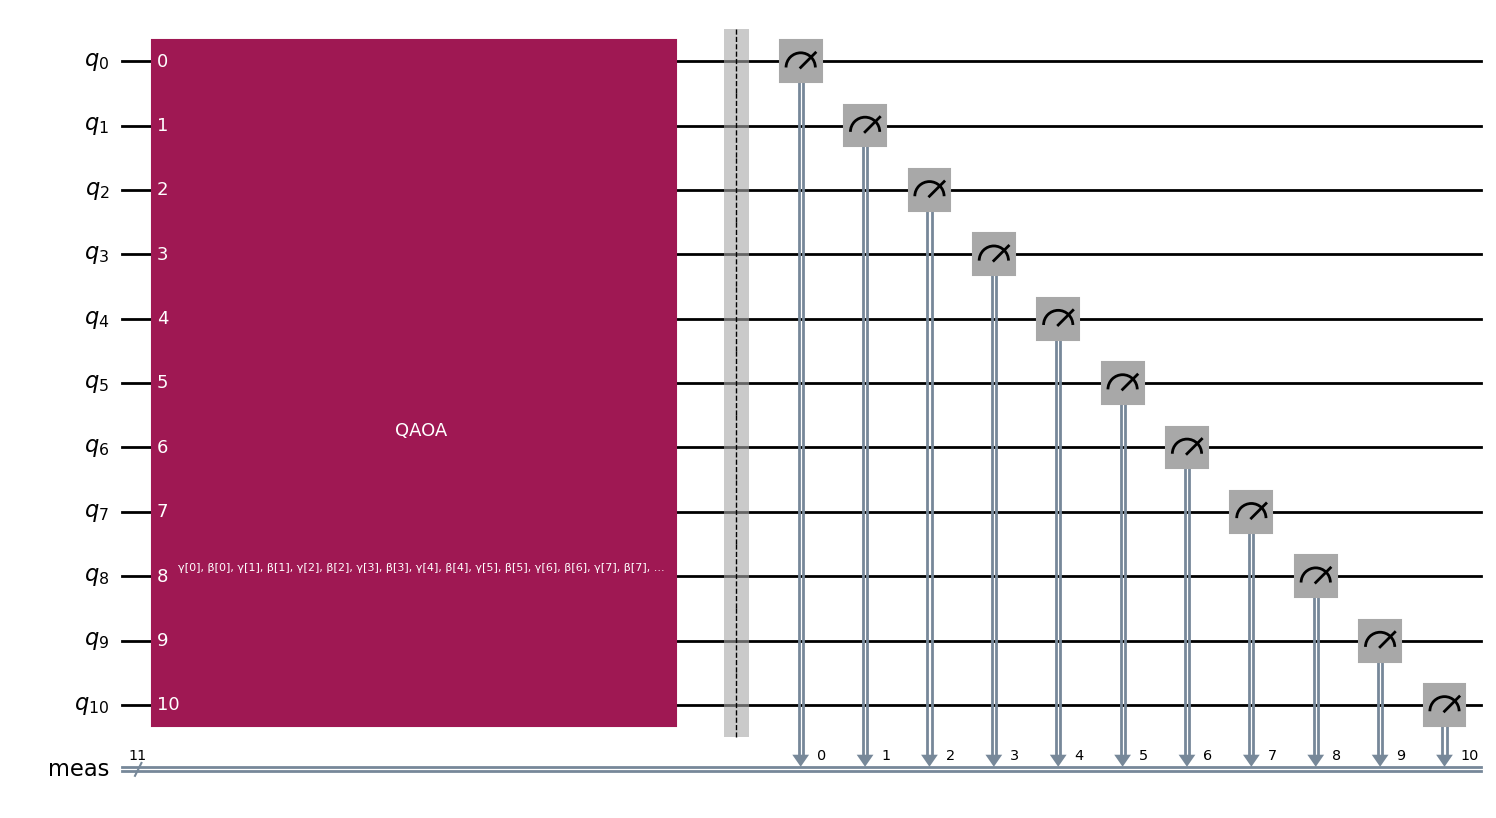

In [35]:
ansatz = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=10)
ansatz.measure_all()
ansatz.draw("mpl")

In [36]:
backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

candidate_circuit = pm.run(ansatz)
candidate_circuit.draw("mpl", fold=False, idle_wires=False)

In [37]:
objective_func_vals = []  # Global variable

In [38]:
def cost_func_estimator(params, ansatz, hamiltonian, estimator):
    # transform the observable defined on virtual qubits to
    # an observable defined on all physical qubits
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)
 
    pub = (ansatz, isa_hamiltonian, params)
    job = estimator.run([pub])
 
    results = job.result()[0]
    cost = results.data.evs
 
    objective_func_vals.append(cost)
 
    return cost

In [39]:
def run_experimet(): 
    init_params = np.random.rand(ansatz.num_parameters) * 2 * np.pi
    objective_func_vals.clear()

    with Session(backend=backend) as session:
        # If using qiskit-ibm-runtime<0.24.0, change `mode=` to `session=`
        estimator = Estimator(mode=session)
        estimator.options.default_shots = 1000
    
        # Set simple error suppression/mitigation options
        #estimator.options.dynamical_decoupling.enable = True
        #estimator.options.dynamical_decoupling.sequence_type = "XY4"
        #estimator.options.twirling.enable_gates = True
        #estimator.options.twirling.num_randomizations = "auto"
    
        result = minimize(
            cost_func_estimator,
            init_params,
            args=(candidate_circuit, cost_hamiltonian, estimator),
            method="COBYLA",
            tol=1e-2,
        )
    optimized_circuit = candidate_circuit.assign_parameters(result.x)

    # If using qiskit-ibm-runtime<0.24.0, change `mode=` to `backend=`
    sampler = Sampler(mode=backend)
    sampler.options.default_shots = 10000
    
    # Set simple error suppression/mitigation options
    #sampler.options.dynamical_decoupling.enable = True
    #sampler.options.dynamical_decoupling.sequence_type = "XY4"
    #sampler.options.twirling.enable_gates = True
    #sampler.options.twirling.num_randomizations = "auto"
    
    pub = (optimized_circuit,)
    job = sampler.run([pub], shots=int(1e4))
    counts_int = job.result()[0].data.meas.get_int_counts()
    counts_bin = job.result()[0].data.meas.get_counts()
    shots = sum(counts_int.values())
    final_distribution_int = {key: val / shots for key, val in counts_int.items()}
    final_distribution_bin = {key: val / shots for key, val in counts_bin.items()}
    
    print(final_distribution_bin)
    first_3 = {}
    for (key, value) in final_distribution_bin.items():
        first = key[:3]
        if first in first_3.keys():
            first_3[first] += value
        else:
            first_3[first] = value

    return first_3
            
    
    

In [40]:
row = 3
column = 3

In [41]:
results = []
for i in range (row*column):
    results.append(run_experimet())

{'00000001000': 0.0149, '10000011111': 0.0036, '11001010101': 0.0014, '10011100110': 0.0003, '10010101010': 0.0006, '01111011001': 0.0006, '00110110110': 0.0005, '11100101111': 0.0003, '00000011101': 0.0047, '01111111100': 0.0031, '01111101010': 0.0171, '01000111101': 0.0004, '01111101000': 0.0443, '00000001110': 0.006, '11111100001': 0.0003, '00011101000': 0.002, '00100110010': 0.0057, '01100011000': 0.0004, '00011111000': 0.0027, '00100110110': 0.0028, '11001000110': 0.0009, '01101100110': 0.0013, '00000010001': 0.0085, '00011001000': 0.0059, '01000001000': 0.0019, '11100011010': 0.0003, '00000010111': 0.0008, '00010101010': 0.003, '00000001100': 0.0048, '10000011010': 0.0014, '10000010101': 0.0092, '00000010010': 0.024, '01001011110': 0.0014, '01010000000': 0.0018, '01110001000': 0.0036, '01111100000': 0.0051, '00000011010': 0.0068, '11010001101': 0.0013, '01001010010': 0.0059, '00000000111': 0.0039, '11111101101': 0.0087, '01011010101': 0.0002, '00111001110': 0.0009, '01110111111':

In [42]:
def plotter(data, ax):
    final_bits = data
    values = np.abs(list(final_bits.values()))
    top_1_values = sorted(values, reverse=True)[:1]
    positions = []
    for value in top_1_values:
        positions.append(np.where(values == value)[0])
    ax.bar(list(final_bits.keys()), list(final_bits.values()), color="tab:grey")
    for p in positions:
        ax.get_children()[int(p[0])].set_color("tab:purple")

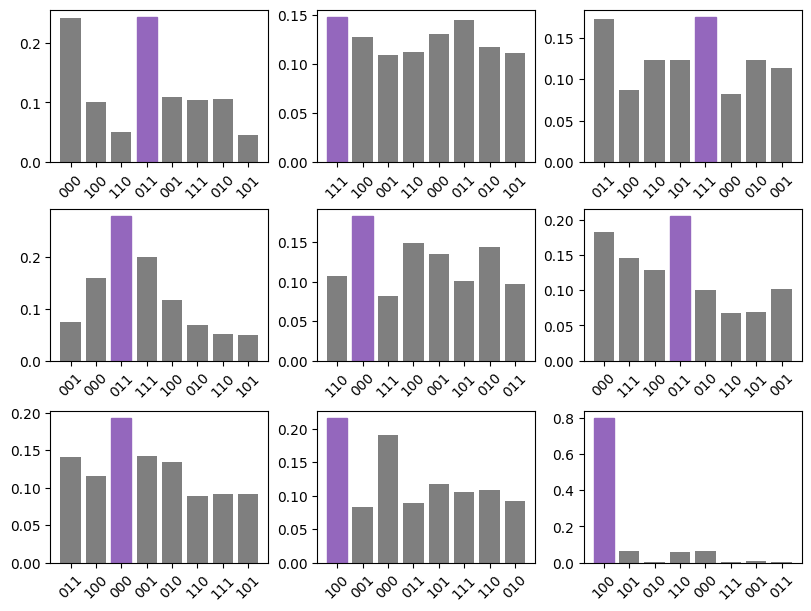

In [43]:
fig, axs = plt.subplots(row, column, layout='constrained', figsize=(8, 6))
for i in range(row):
    for j in range(column):
        plotter(results[i * row + j], axs[i][j])
        axs[i][j].tick_params(axis='x', labelrotation=45)
 

In [44]:
fig.savefig("asd3.pdf", format="pdf")